In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
##Helper functions. Use when needed. 
def show_orignal_images(pixels):
    #Displaying Orignal Images
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

In [3]:
def show_eigenfaces(pca):
    #Displaying Eigenfaces
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()

(400, 4096)


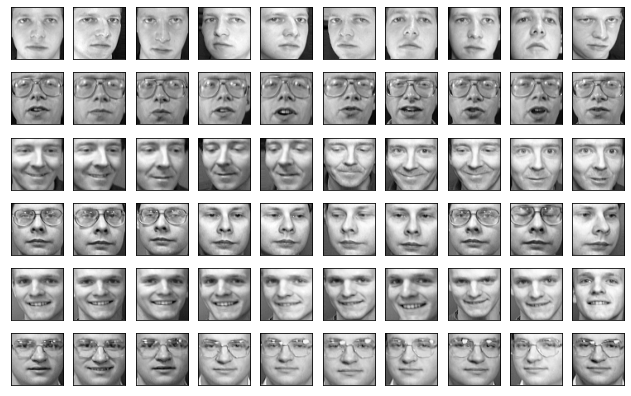

In [14]:
### Read dataset and visualize it

df = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\face_data.csv")
targets = df["target"]
pixels = df.drop(["target"],axis=1)

print(np.array(pixels).shape)

show_orignal_images(pixels)

In [5]:
### Split Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)

print(x_train)

            0         1         2         3         4         5         6  \
9    0.380165  0.442149  0.483471  0.545455  0.582645  0.628099  0.648760   
61   0.305785  0.305785  0.549587  0.665289  0.657025  0.673554  0.677686   
84   0.520661  0.533058  0.541322  0.578512  0.623967  0.640496  0.648760   
338  0.425620  0.454545  0.471074  0.487603  0.516529  0.500000  0.528926   
323  0.144628  0.123967  0.111570  0.111570  0.123967  0.128099  0.136364   
..        ...       ...       ...       ...       ...       ...       ...   
11   0.644628  0.690083  0.702479  0.702479  0.706612  0.719008  0.727273   
263  0.442149  0.578512  0.706612  0.776860  0.789256  0.776860  0.789256   
197  0.252066  0.330578  0.396694  0.442149  0.512397  0.545455  0.545455   
68   0.231405  0.223140  0.206612  0.206612  0.198347  0.181818  0.219008   
376  0.165289  0.285124  0.404959  0.504132  0.595041  0.665289  0.698347   

            7         8         9  ...      4086      4087      4088  \
9  

In [6]:
print(x_test)

            0         1         2         3         4         5         6  \
185  0.252066  0.231405  0.276859  0.417355  0.433884  0.669422  0.834711   
271  0.595041  0.640496  0.615702  0.644628  0.685950  0.723140  0.731405   
258  0.619835  0.681818  0.698347  0.710744  0.710744  0.714876  0.714876   
82   0.520661  0.553719  0.574380  0.582645  0.595041  0.623967  0.644628   
390  0.545455  0.611570  0.640496  0.657025  0.636364  0.648760  0.690083   
..        ...       ...       ...       ...       ...       ...       ...   
249  0.640496  0.681818  0.719008  0.731405  0.739669  0.764463  0.776860   
211  0.148760  0.148760  0.148760  0.165289  0.264463  0.363636  0.421488   
36   0.185950  0.342975  0.512397  0.570248  0.628099  0.615702  0.652893   
326  0.144628  0.123967  0.115702  0.111570  0.123967  0.128099  0.132231   
319  0.471074  0.557851  0.644628  0.578512  0.409091  0.603306  0.743802   

            7         8         9  ...      4086      4087      4088  \
185

In [7]:
print( y_train)

9       0
61      6
84      8
338    33
323    32
       ..
11      1
263    26
197    19
68      6
376    37
Name: target, Length: 300, dtype: int64


In [8]:
print(y_test)

185    18
271    27
258    25
82      8
390    39
       ..
249    24
211    21
36      3
326    32
319    31
Name: target, Length: 100, dtype: int64


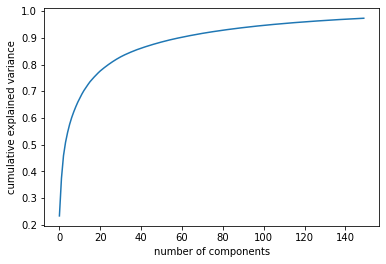

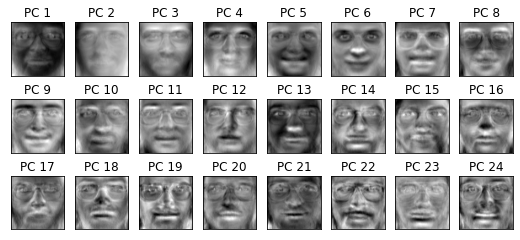

In [9]:
### Perform PCA.
pca = PCA(n_components=150).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
show_eigenfaces(pca)

In [10]:
### Project Training data to PCA
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)
print(Xtrain_pca)

Projecting the input data on the eigenfaces orthonormal basis
[[-1.9543271  -1.57123937  5.56239948 ...  0.25618819  0.03043329
  -0.17795127]
 [-2.2961352  -1.48259815 -1.68801007 ... -0.03502345 -0.02818492
  -0.14165924]
 [-1.06939918  1.40548016  2.10876816 ... -0.13761682  0.01149697
   0.12960595]
 ...
 [-2.22913282  3.5104169  -0.20772142 ... -0.01797006 -0.14034473
   0.26056458]
 [-6.68052439  2.71780566 -2.13589745 ... -0.07195124  0.11392066
   0.1116371 ]
 [ 0.4224484  -1.64965874  3.28817127 ...  0.29973425 -0.10249716
  -0.12153501]]


In [11]:
### Initialize Classifer and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)
print(clf)

SVC(C=1000, gamma=0.001)


In [12]:
### Perform testing and get classification report
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

Predicting people's names on the test set
done in 0.038s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         6
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       0.67      1.00      0.80         2
          18       1.00 